In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
# Point class with additional time attribute
class Point:
    def __init__(self, x, y, demand=0, travel_time={}):
        self.x = x
        self.y = y
        self.demand = demand
        self.visited = False
        self.travel_time = travel_time

In [3]:
# Distance function
def distance(p1, p2):
    return math.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)

In [4]:
# Calculate travel time between two points
def get_travel_time(p1, p2):
    if p1.travel_time.get(p2) is None:
        # Add your logic here to calculate the actual travel time between points (e.g., Google Maps API)
        travel_time = random.uniform(0.5, 2.0)  # Example with random time
        p1.travel_time[p2] = travel_time
        p2.travel_time[p1] = travel_time
    return p1.travel_time[p2]

In [5]:
# Generate initial population of routes (random permutations)
def generate_population(points, population_size):
    population = []
    for _ in range(population_size):
        route = list(range(len(points)))
        random.shuffle(route)
        population.append(route)
    return population

In [6]:
# Calculate fitness of a route (total distance + weighted time)
def calculate_fitness(route, points, weight_distance=1.0, weight_time=0.5):
    total_distance = 0
    total_time = 0
    for i in range(len(route) - 1):
        p1 = points[route[i]]
        p2 = points[route[i + 1]]
        total_distance += distance(p1, p2)
        total_time += get_travel_time(p1, p2)
    return weight_distance * total_distance + weight_time * total_time

In [7]:
# Selection (tournament selection) considering combined fitness
def tournament_selection(population, fitness_scores, selection_size):
    selected_routes = []
    for _ in range(selection_size):
        competitors = random.sample(population, k=2)
        winner_index = min(range(len(competitors)), key=lambda i: fitness_scores[i])
        selected_routes.append(population[winner_index])
    return selected_routes

In [8]:
# Crossover (order crossover)
def order_crossover(route1, route2):
    crossover_point = random.randint(1, len(route1) - 1)
    remaining_elements1 = [i for i in route2 if i not in route1[:crossover_point]]
    offspring1 = route1[:crossover_point] + remaining_elements1
    remaining_elements2 = [i for i in route1 if i not in route2[:crossover_point]]
    offspring2 = route2[:crossover_point] + remaining_elements2
    return offspring1, offspring2

In [9]:
# Mutation (swap mutation)
def swap_mutation(route, mutation_rate):
    for i in range(len(route) - 1):
        if random.random() < mutation_rate:
            j = random.randint(i + 1, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

In [10]:
# Genetic algorithm for finding the shortest route considering both distance and time
def genetic_algorithm(points, population_size, generations, mutation_rate, weight_distance=1.0, weight_time=0.5):
    population = generate_population(points, population_size)
    fitness_scores = [calculate_fitness(route, points, weight_distance, weight_time) for route in population]
    for _ in range(generations):
        # Selection
        selected_routes = tournament_selection(population, fitness_scores, population_size // 2)
        # Crossover
        offspring = []
        for i in range(0, len(selected_routes), 2):
            offspring1, offspring2 = order_crossover(selected_routes[i], selected_routes[i + 1])
            offspring.extend([offspring1, offspring2])
        # Mutation
        for i in range(len(offspring)):
            offspring[i] = swap_mutation(offspring[i].copy(), mutation_rate)
        # Replace population
        population = offspring
        # Update fitness scores
        fitness_scores = [calculate_fitness(route, points, weight_distance, weight_time) for route in population]
    best_route = population[min(range(len(population)), key=lambda i: fitness_scores[i])]
    return best_route

Order of visits (Time): Point 2 -> Point 8 -> Point 5 -> Point 1 -> Point 4 -> Point 0 -> Point 9 -> Point 3 -> Point 7
Total time: 13.02493137350488
Order of visits (Distance): Point 2 -> Point 8 -> Point 5 -> Point 1 -> Point 4 -> Point 0 -> Point 9 -> Point 3 -> Point 7
Total distance: 33.50070658469225


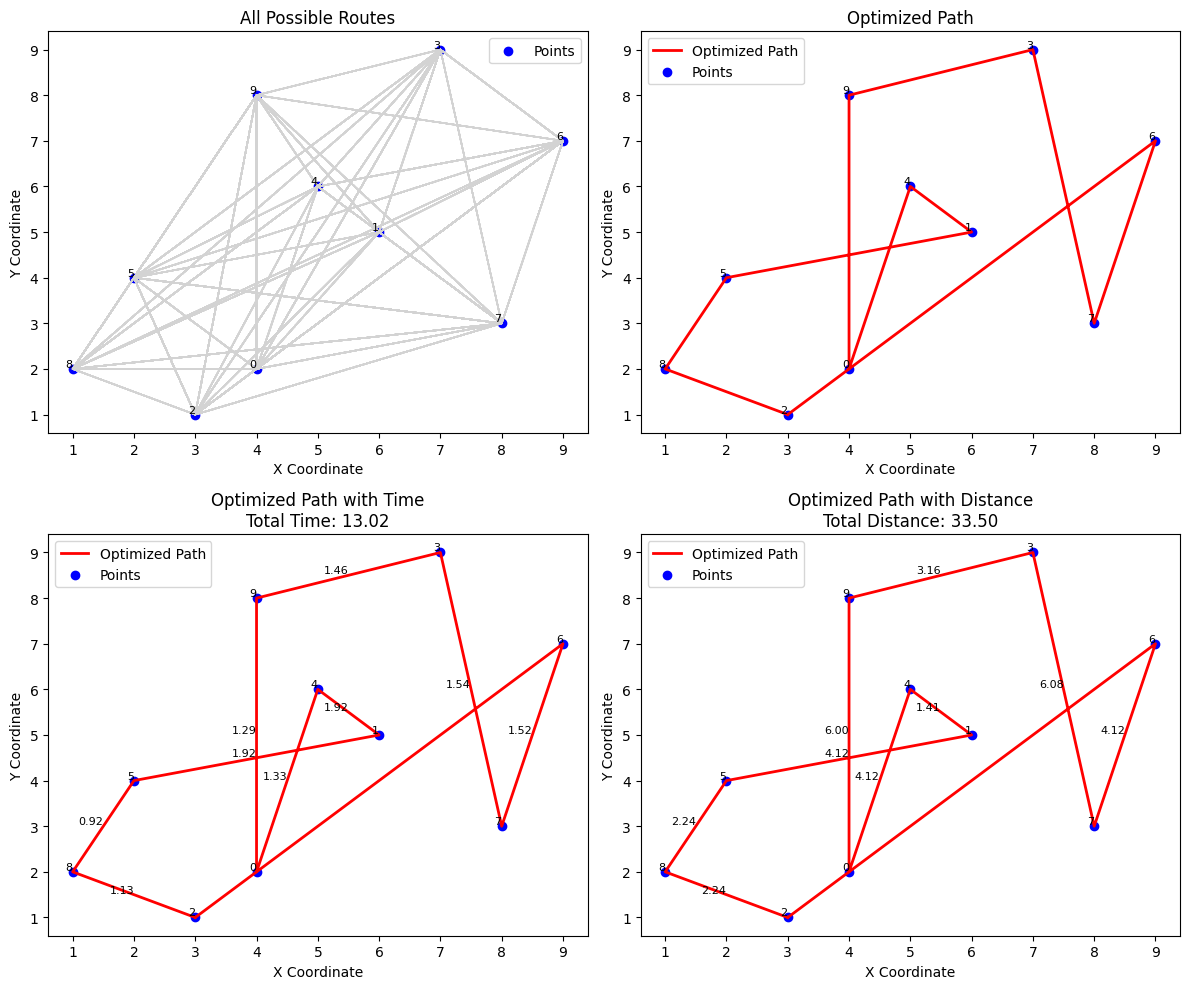

In [11]:
def print_and_plot_routes(points, routes, optimized_route):
    # Initialize subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot all possible routes
    ax1 = axes[0, 0]
    for route in routes:
        route_x = [points[i].x for i in route + [route[0]]]
        route_y = [points[i].y for i in route + [route[0]]]
        ax1.plot(route_x, route_y, color='lightgray', linestyle='-', linewidth=1)
    ax1.scatter([point.x for point in points], [point.y for point in points], color='blue', label='Points')
    for i, point in enumerate(points):
        ax1.text(point.x, point.y, f'{i}', fontsize=8, ha='right', va='bottom')
    ax1.set_title('All Possible Routes')

    # Plot optimized route
    ax2 = axes[0, 1]
    optimized_x = [points[i].x for i in optimized_route + [optimized_route[0]]]
    optimized_y = [points[i].y for i in optimized_route + [optimized_route[0]]]
    ax2.plot(optimized_x, optimized_y, color='red', linestyle='-', linewidth=2, label='Optimized Path')
    ax2.scatter([point.x for point in points], [point.y for point in points], color='blue', label='Points')
    for i, point in enumerate(points):
        ax2.text(point.x, point.y, f'{i}', fontsize=8, ha='right', va='bottom')
    ax2.set_title('Optimized Path')

    # Plot optimized route with time
    ax3 = axes[1, 0]
    total_time = 0
    order_of_visits_time = []
    for i in range(len(optimized_route) - 1):
        p1 = points[optimized_route[i]]
        p2 = points[optimized_route[i + 1]]
        time_value = get_travel_time(p1, p2)
        total_time += time_value
        center_x = (p1.x + p2.x) / 2
        center_y = (p1.y + p2.y) / 2
        ax3.text(center_x, center_y, f'{time_value:.2f}', fontsize=8, ha='right', va='bottom')
        order_of_visits_time.append(f"Point {optimized_route[i]}")
    ax3.plot(optimized_x, optimized_y, color='red', linestyle='-', linewidth=2, label='Optimized Path')
    ax3.scatter([point.x for point in points], [point.y for point in points], color='blue', label='Points')
    for i, point in enumerate(points):
        ax3.text(point.x, point.y, f'{i}', fontsize=8, ha='right', va='bottom')
    ax3.set_title(f'Optimized Path with Time\nTotal Time: {total_time:.2f}')

    # Plot optimized route with distance
    ax4 = axes[1, 1]
    total_distance = 0
    order_of_visits_distance = []
    for i in range(len(optimized_route) - 1):
        p1 = points[optimized_route[i]]
        p2 = points[optimized_route[i + 1]]
        distance_value = distance(p1, p2)
        total_distance += distance_value
        center_x = (p1.x + p2.x) / 2
        center_y = (p1.y + p2.y) / 2
        ax4.text(center_x, center_y, f'{distance_value:.2f}', fontsize=8, ha='right', va='bottom')
        order_of_visits_distance.append(f"Point {optimized_route[i]}")
    ax4.plot(optimized_x, optimized_y, color='red', linestyle='-', linewidth=2, label='Optimized Path')
    ax4.scatter([point.x for point in points], [point.y for point in points], color='blue', label='Points')
    for i, point in enumerate(points):
        ax4.text(point.x, point.y, f'{i}', fontsize=8, ha='right', va='bottom')
    ax4.set_title(f'Optimized Path with Distance\nTotal Distance: {total_distance:.2f}')

    # Print details
    print("Order of visits (Time):", " -> ".join(order_of_visits_time))
    print("Total time:", total_time)

    print("Order of visits (Distance):", " -> ".join(order_of_visits_distance))
    print("Total distance:", total_distance)

    # Set common labels and legend
    for ax in axes.flatten():
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage with around 10 points
points = [
    Point(4, 2), Point(6, 5), Point(3, 1), Point(7, 9),
    Point(5, 6), Point(2, 4), Point(9, 7), Point(8, 3),
    Point(1, 2), Point(4, 8)
]

# Set parameters
population_size = 100
generations = 50
mutation_rate = 0.1

# Run genetic algorithm
initial_routes = generate_population(points, population_size)
best_route = genetic_algorithm(points, population_size, generations, mutation_rate)

# Print details and plot four separate graphs
print_and_plot_routes(points, initial_routes, best_route)


Best route: [4, 6, 1, 11, 8, 9, 2, 7, 0, 5, 3, 10]
Best distance: 400.64
Elapsed time: 0.52 seconds


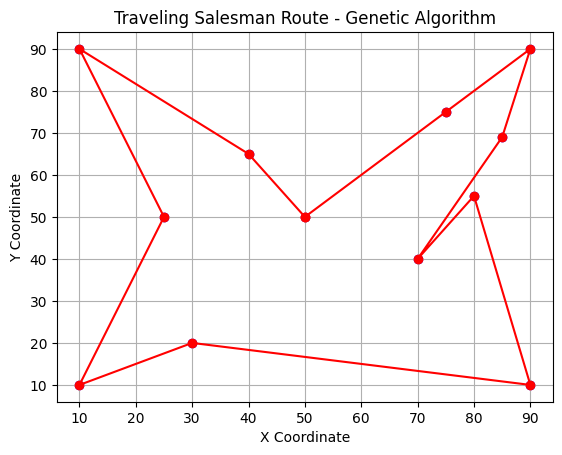

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

def create_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i][j] = euclidean_distance(coordinates[i], coordinates[j])
            else:
                distance_matrix[i][j] = np.inf
    return distance_matrix

def initialize_population(size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(size)]

def calculate_fitness(population, distance_matrix):
    fitness = np.zeros(len(population))
    for i, individual in enumerate(population):
        route_distance = sum(distance_matrix[individual[j], individual[j + 1]] for j in range(len(individual) - 1))
        route_distance += distance_matrix[individual[-1], individual[0]]
        fitness[i] = 1 / route_distance
    return fitness

def select_parents(population, fitness, num_parents):
    parents = []
    for _ in range(num_parents):
        parents.append(population[np.argmax(fitness)])
        fitness[np.argmax(fitness)] = 0  # Set fitness to zero to prevent reselection
    return parents

def crossover(parents, offspring_size):
    offspring = []
    for _ in range(offspring_size):
        parent1, parent2 = random.sample(parents, 2)
        crossover_point = random.randint(0, len(parent1) - 1)
        child = parent1[:crossover_point] + [city for city in parent2 if city not in parent1[:crossover_point]]
        offspring.append(child)
    return offspring

def mutate(offspring, mutation_rate):
    for i in range(len(offspring)):
        if random.random() < mutation_rate:
            swap_indices = random.sample(range(len(offspring[i])), 2)
            offspring[i][swap_indices[0]], offspring[i][swap_indices[1]] = offspring[i][swap_indices[1]], offspring[i][swap_indices[0]]
    return offspring

def genetic_algorithm(coordinates, population_size, num_generations, mutation_rate):
    num_cities = len(coordinates)
    distance_matrix = create_distance_matrix(coordinates)
    population = initialize_population(population_size, num_cities)
    best_distance = np.inf
    best_route = None

    for generation in range(num_generations):
        fitness = calculate_fitness(population, distance_matrix)
        best_idx = np.argmax(fitness)
        current_best_dist = 1 / fitness[best_idx]
        if current_best_dist < best_distance:
            best_distance = current_best_dist
            best_route = population[best_idx]

        parents = select_parents(population, fitness, population_size // 2)
        offspring = crossover(parents, offspring_size=len(population) - len(parents))
        offspring = mutate(offspring, mutation_rate)
        population = parents + offspring

    return best_route, best_distance

# Parameters
coordinates = np.array([
    [10, 10], [90, 90], [90, 10], [10, 90],
    [50, 50], [25, 50], [75, 75], [30, 20],
    [70, 40], [80, 55], [40, 65], [85, 69]
])
population_size = 100
num_generations = 200
mutation_rate = 0.01

# Run GA
start_time = time.time()
best_route, best_distance = genetic_algorithm(coordinates, population_size, num_generations, mutation_rate)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Best route: {best_route}")
print(f"Best distance: {best_distance:.2f}")
print(f"Elapsed time: {elapsed_time:.2f} seconds")

# Function to plot the route
def plot_route(coordinates, route):
    route_coordinates = coordinates[route + [route[0]]]
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue')
    plt.plot(route_coordinates[:, 0], route_coordinates[:, 1], color='red', marker='o')
    plt.title('Traveling Salesman Route - Genetic Algorithm')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

plot_route(coordinates, best_route)


Generation 0: Best distance = 575.07


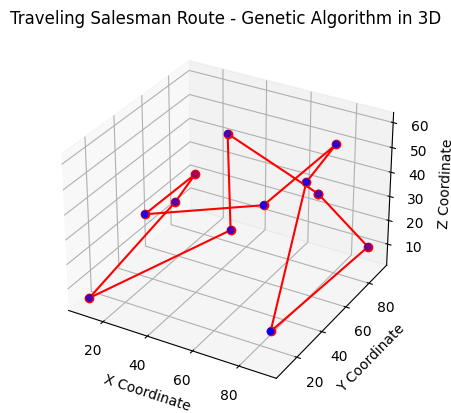

Generation 20: Best distance = 514.36


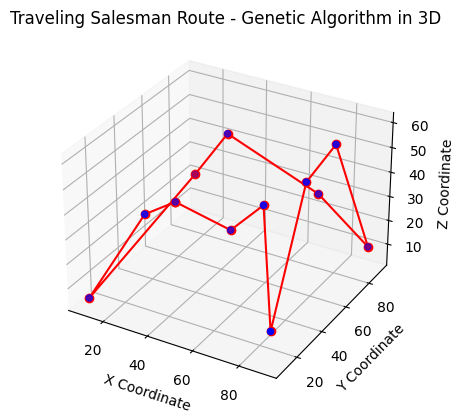

Generation 40: Best distance = 514.36


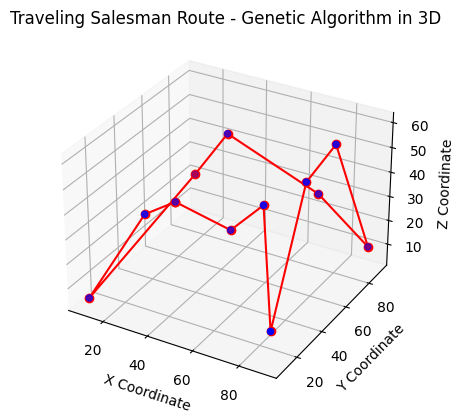

Generation 60: Best distance = 499.62


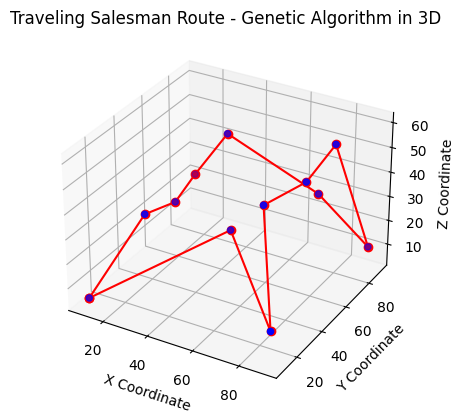

Generation 80: Best distance = 499.62


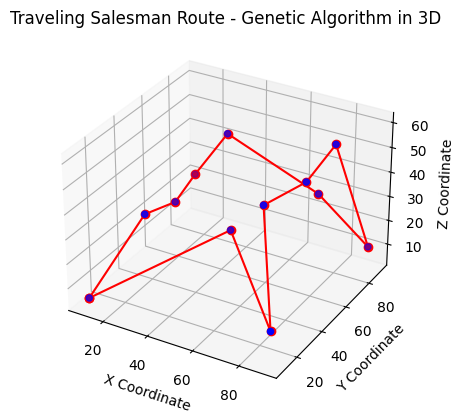

Generation 100: Best distance = 499.62


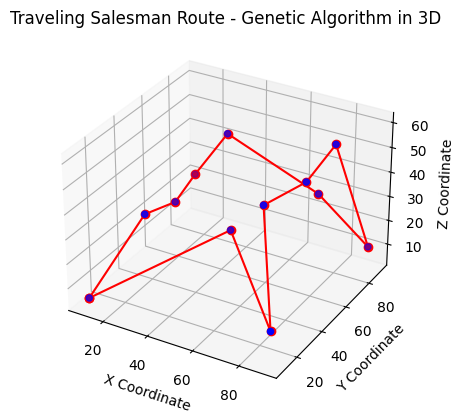

Generation 120: Best distance = 499.62


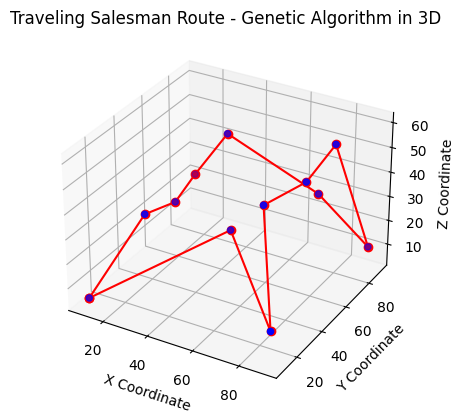

Generation 140: Best distance = 496.15


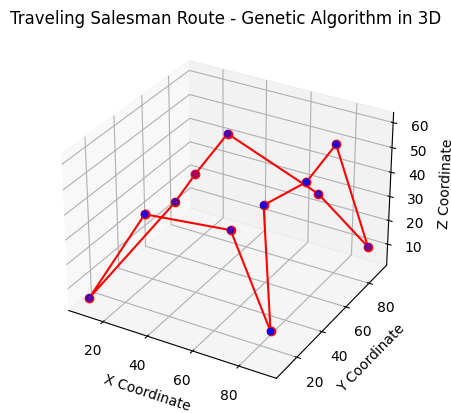

Generation 160: Best distance = 495.33


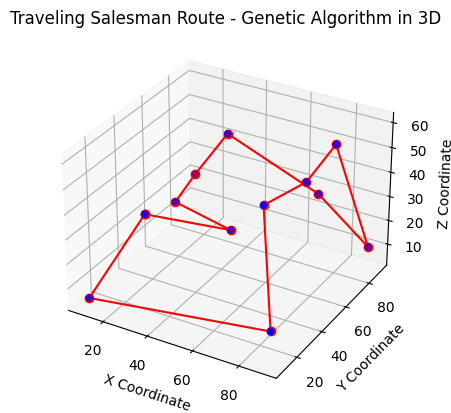

Generation 180: Best distance = 495.33


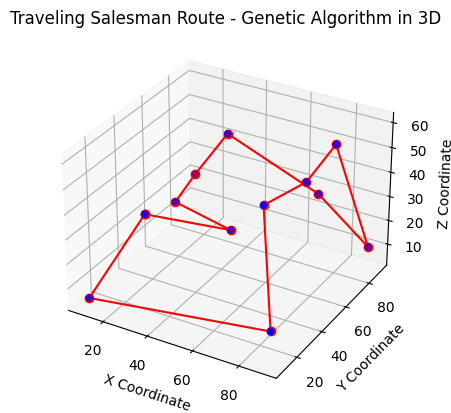

Final Best route: [7, 4, 5, 3, 10, 6, 1, 11, 9, 8, 2, 0]
Final Best distance: 495.33
Elapsed time: 2.89 seconds


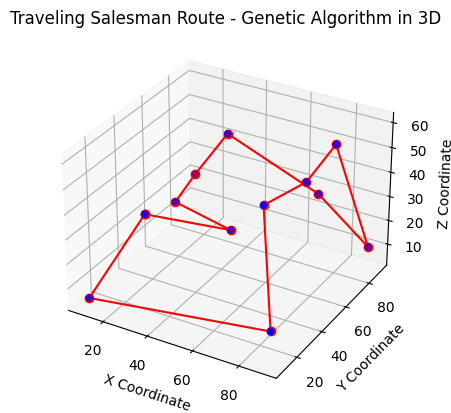

In [13]:
#G_TSP

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import time

def euclidean_distance_3d(c1, c2):
    """Calculate the Euclidean distance between two points in 3D."""
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2 + (c1[2] - c2[2])**2)

def create_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i][j] = euclidean_distance_3d(coordinates[i], coordinates[j])
            else:
                distance_matrix[i][j] = np.inf
    return distance_matrix

def initialize_population(size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(size)]

def calculate_fitness(population, distance_matrix):
    fitness = np.zeros(len(population))
    for i, individual in enumerate(population):
        route_distance = sum(distance_matrix[individual[j], individual[j + 1]] for j in range(len(individual) - 1))
        route_distance += distance_matrix[individual[-1], individual[0]]
        fitness[i] = 1 / route_distance
    return fitness

def select_parents(population, fitness, num_parents):
    parents = []
    for _ in range(num_parents):
        parents.append(population[np.argmax(fitness)])
        fitness[np.argmax(fitness)] = 0  # Set fitness to zero to prevent reselection
    return parents

def crossover(parents, offspring_size):
    offspring = []
    for _ in range(offspring_size):
        parent1, parent2 = random.sample(parents, 2)
        crossover_point = random.randint(0, len(parent1) - 1)
        child = parent1[:crossover_point] + [city for city in parent2 if city not in parent1[:crossover_point]]
        offspring.append(child)
    return offspring

def mutate(offspring, mutation_rate):
    for i in range(len(offspring)):
        if random.random() < mutation_rate:
            swap_indices = random.sample(range(len(offspring[i])), 2)
            offspring[i][swap_indices[0]], offspring[i][swap_indices[1]] = offspring[i][swap_indices[1]], offspring[i][swap_indices[0]]
    return offspring

def genetic_algorithm(coordinates, population_size, num_generations, mutation_rate):
    num_cities = len(coordinates)
    distance_matrix = create_distance_matrix(coordinates)
    population = initialize_population(population_size, num_cities)
    best_distance = np.inf
    best_route = None

    for generation in range(num_generations):
        fitness = calculate_fitness(population, distance_matrix)
        best_idx = np.argmax(fitness)
        current_best_dist = 1 / fitness[best_idx]
        if current_best_dist < best_distance:
            best_distance = current_best_dist
            best_route = population[best_idx]
        if generation % 20 == 0:  # Print and plot every 20 generations
            print(f"Generation {generation}: Best distance = {current_best_dist:.2f}")
            plot_route_3d(coordinates, population[best_idx])

        parents = select_parents(population, fitness, population_size // 2)
        offspring = crossover(parents, offspring_size=len(population) - len(parents))
        offspring = mutate(offspring, mutation_rate)
        population = parents + offspring

    return best_route, best_distance

def plot_route_3d(coordinates, route):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    route_coords = coordinates[route + [route[0]]]
    ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], color='blue')
    ax.plot(route_coords[:, 0], route_coords[:, 1], route_coords[:, 2], color='red', marker='o')
    ax.set_title('Traveling Salesman Route - Genetic Algorithm in 3D')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.grid(True)
    plt.show()

# Parameters and run GA
coordinates = np.array([
    [10, 10, 5], [90, 90, 10], [90, 10, 15], [10, 90, 20],
    [50, 50, 25], [25, 50, 30], [75, 75, 35], [30, 20, 40],
    [70, 40, 45], [80, 55, 50], [40, 65, 55], [85, 69, 60]
])
population_size = 100
num_generations = 200
mutation_rate = 0.01

start_time = time.time()
best_route, best_distance = genetic_algorithm(coordinates, population_size, num_generations, mutation_rate)
end_time = time.time()

print(f"Final Best route: {best_route}")
print(f"Final Best distance: {best_distance:.2f}")
print(f"Elapsed time: {end_time - start_time:.2f} seconds")

# Final plot of the best route found
plot_route_3d(coordinates, best_route)

 a Genetic Algorithm (GA) to solve the Traveling Salesman Problem (TSP):

### Import Section
```python
import numpy as np
import matplotlib.pyplot as plt
import random
import time
```
- **`numpy`**: Used for numerical operations like matrix and array manipulations.
- **`matplotlib.pyplot`**: Used for plotting graphs and routes on a 2D plane.
- **`random`**: Used for generating random numbers, crucial for genetic operations like crossover and mutation.
- **`time`**: Used to measure the execution time of the algorithm, helping to evaluate its performance.

### Function Definitions

#### Euclidean Distance
```python
def euclidean_distance(c1, c2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
```
- Calculates the straight-line distance between two points in 2D space.

#### Create Distance Matrix
```python
def create_distance_matrix(coordinates):
    n = len(coordinates)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i][j] = euclidean_distance(coordinates[i], coordinates[j])
            else:
                distance_matrix[i][j] = np.inf
    return distance_matrix
```
- Creates a matrix of distances between each pair of cities.
- Distance from a city to itself is set to infinity to prevent the algorithm from considering it.

#### Initialize Population
```python
def initialize_population(size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(size)]
```
- Generates an initial population of routes. Each route is a permutation of city indices, representing a possible solution.

#### Calculate Fitness
```python
def calculate_fitness(population, distance_matrix):
    fitness = np.zeros(len(population))
    for i, individual in enumerate(population):
        route_distance = sum(distance_matrix[individual[j], individual[j + 1]] for j in range(len(individual) - 1))
        route_distance += distance_matrix[individual[-1], individual[0]]
        fitness[i] = 1 / route_distance
    return fitness
```
- Calculates fitness for each individual in the population. Fitness is inversely proportional to the route distance: the shorter the distance, the higher the fitness.

#### Select Parents
```python
def select_parents(population, fitness, num_parents):
    parents = []
    for _ in range(num_parents):
        parents.append(population[np.argmax(fitness)])
        fitness[np.argmax(fitness)] = 0  # Set fitness to zero to prevent reselection
    return parents
```
- Selects the best individuals from the current population to be parents for the next generation.

#### Crossover
```python
def crossover(parents, offspring_size):
    offspring = []
    for _ in range(offspring_size):
        parent1, parent2 = random.sample(parents, 2)
        crossover_point = random.randint(0, len(parent1) - 1)
        child = parent1[:crossover_point] + [city for city in parent2 if city not in parent1[:crossover_point]]
        offspring.append(child)
    return offspring
```
- Generates new individuals (offspring) by combining parts of two parent routes. This mimics biological crossover.

#### Mutate
```python
def mutate(offspring, mutation_rate):
    for i in range(len(offspring)):
        if random.random() < mutation_rate:
            swap_indices = random.sample(range(len(offspring[i])), 2)
            offspring[i][swap_indices[0]], offspring[i][swap_indices[1]] = offspring[i][swap_indices[1]], offspring[i][swap_indices[0]]
    return offspring
```
- Introduces random changes to the offspring to maintain genetic diversity within the population.

### Genetic Algorithm Main Function
```python
def genetic_algorithm(coordinates, population_size, num_generations, mutation_rate):
    num_cities = len(coordinates)
    distance_matrix = create_distance_matrix(coordinates)
    population = initialize_population(population_size, num_cities)
    best_distance = np.inf
    best_route = None

    for generation in range(num_generations):
        fitness = calculate_fitness(population, distance_matrix)
        best_idx = np.argmax(fitness)
        current_best_dist = 1 / fitness[best_idx]
        if current_best_dist < best_distance:
            best_distance = current_best_dist
            best_route = population[best_idx]

        parents = select_parents(population, fitness, population_size // 2)
        offspring = crossover(parents, offspring_size=len(population) - len(parents))
        offspring = mutate(offspring, mutation_rate)
        population = parents + offspring



    return best_route, best_distance
```
- Orchestrates the entire genetic algorithm process, from initialization through selection, crossover, mutation, and termination after a set number of generations.

### Complexity Analysis
- **Initialization** of the distance matrix is \(O(n^2)\) due to the nested loops calculating distances between all pairs of cities.
- **Fitness Calculation** each generation also involves \(O(n^2)\) complexity because it computes the total distance for each route in the population.
- **Selection**, **Crossover**, and **Mutation** involve operations that are proportional to the population size and the number of cities but are generally dominated by the distance calculations.

Overall, the genetic algorithm's complexity is primarily influenced by the number of generations and the size of the population, making it \(O(G \times P \times n^2)\), where \(G\) is the number of generations, \(P\) is the population size, and \(n\) is the number of cities. This makes the GA suitable for medium-sized datasets but potentially slow for very large problems unless parallelized or optimized further.